# Supervised Machine Learning

#### Introduction
**Supervised Machine Learning involves training models on labeled data to predict outcomes or classify data into categories.** This notebook demonstrates key algorithms with practical examples.


In [1]:
!pip install xgboost

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Section 1: Linear Regression

### 1.1 Importing Libraries
**Load essential libraries for handling data and building machine learning models.** Libraries like `numpy` and `pandas` are used for data manipulation, while `sklearn` provides the tools for creating and evaluating models.


In [3]:
# -------------------------------------------------
# Linear Regression: Using the California Housing dataset
# -------------------------------------------------

from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

### 1.2 Loading and Exploring Data
**Examine the dataset to understand its structure and identify features (inputs) and the target variable (output).**
- Features (`X`) represent independent variables used to make predictions.
- The target (`y`) is the dependent variable we aim to predict.


In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y.head().to_frame()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1.3 Splitting the Dataset
**Divide the data into training and testing sets.**
- Training set: Used to train the model.
- Testing set: Used to evaluate the model's performance on unseen data.
- A typical split is 80% training and 20% testing data.


In [6]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.4 Training the Model
**Fit a Linear Regression model to the training data.** The model learns the relationship between features and the target variable.


In [7]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### 1.5 Prediction and Evaluation
**Use the trained model to make predictions on the test set and evaluate its accuracy.**
- Metric: Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. Lower MSE indicates better performance.


In [8]:
# Predict and evaluate
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [9]:
print("Linear Regression MSE:", mean_squared_error(y_test, linear_predictions))

Linear Regression MSE: 0.5558915986952444


## **Section 2: Logistic Regression**

### **2.1 Description**
Logistic Regression is a classification algorithm used to predict the probability of a categorical dependent variable.
- Instead of predicting a continuous value (as in Linear Regression), Logistic Regression predicts the likelihood of an outcome falling into one of the categories.
- The algorithm uses the sigmoid (logistic) function to model probabilities.
- It is commonly used for binary classification tasks but can also be extended to multi-class problems.

**Use Cases:**
- Identifying spam emails.
- Predicting whether a customer will churn.
- Diagnosing diseases based on medical data.

### **2.2 Importing Libraries**
Load the necessary libraries for Logistic Regression modeling and evaluation.
- `LogisticRegression`: Used to create and train the Logistic Regression model.
- `accuracy_score`: Evaluates the model's performance by calculating the percentage of correct predictions.

In [10]:
# -------------------------------------------------
# Logistic Regression: Using Titanic dataset
# -------------------------------------------------
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(titanic_url)

### **2.3 Loading and Exploring Data**
Load and examine the Titanic dataset.
- **Dataset Overview**: The Titanic dataset contains details about passengers on the Titanic, including their class, age, gender, and survival status.
- **Features (`X`)**: Relevant passenger characteristics such as `Pclass` (ticket class), `Sex`, `Age`, and `Fare`.
- **Target (`y`)**: Survival status (`1` for survived, `0` for not survived).
- Explore the first few rows of the dataset to understand its structure and ensure data integrity.

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **2.4 Data Preparation**
Preprocess the dataset to make it suitable for training:
- **Encoding Categorical Variables**: Convert categorical data, such as `Sex`, into numerical values (e.g., `0` for male and `1` for female).
- **Handling Missing Values**: Remove or impute rows with missing data to ensure the dataset is clean.
- Ensure all feature values are numeric and consistent for the machine learning model to process.

In [12]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_data = titanic_data.dropna()

In [15]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### **2.5 Splitting the Dataset**
Split the preprocessed Titanic dataset into training and testing subsets.
- Use features such as `Pclass`, `Sex`, `Age`, and `Fare` to predict the target variable `Survived`.
- The split ensures that the model is evaluated on data it has not seen during training, providing an unbiased estimate of performance.

In [16]:
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **2.6 Training the Model**
Train the Logistic Regression model using the training data.
- During training, the model estimates the weights of the features that best predict the likelihood of survival.
- The model iteratively optimizes these weights to minimize classification errors.

In [17]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### **2.7 Prediction and Evaluation**
Use the trained Logistic Regression model to make predictions and evaluate its performance.
- **Prediction**: Predict the survival status of passengers in the test set.
- **Evaluation Metric**: Accuracy Score
  - Accuracy is calculated as the percentage of correct predictions out of the total number of predictions.
  - A higher accuracy indicates better model performance.

In [18]:
# Predict and evaluate
logistic_predictions = logistic_model.predict(X_test)
logistic_predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.7297297297297297


## **Section 3: Support Vector Machine (SVM)**

### **3.1 Description**
Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. They aim to find the best hyperplane that separates data points of different classes in the feature space.
- **Key Idea**: Maximize the margin (distance) between data points of different classes.
- **Kernel Trick**: Transform data into higher dimensions when it is not linearly separable.
- **Applications**: Text classification, image recognition, bioinformatics, etc.

### **3.2 Importing Libraries**
Load the required libraries for building and evaluating an SVM model.
- `SVC` from `sklearn.svm`: This is used to create and train Support Vector Machines for classification tasks.
- `accuracy_score` from `sklearn.metrics`: To measure the accuracy of the predictions.

### **3.3 Loading and Exploring Data**
Load the Wine dataset, which contains chemical properties of wines and their classification into categories.
- **Features (`X`)**: Attributes of wine, such as alcohol content and acidity.
- **Target (`y`)**: The wine's classification into one of three categories.
- The dataset provides insight into the chemical makeup of wines and their corresponding quality classification.
- Inspect the first few rows to understand the structure of the dataset.

In [20]:
# -------------------------------------------------
# SVM: Using the Wine dataset
# -------------------------------------------------
from sklearn.datasets import load_wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.head().to_frame()

,0
0,0
1,0
2,0
3,0
4,0


### **3.4 Splitting the Dataset**
Divide the data into training and testing subsets.
- The training set will be used to train the model on known classifications of wines.
- The test set will be used to evaluate how well the model generalizes to new, unseen data.
- A standard split of 80% training and 20% testing ensures the model has sufficient data for learning and validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3.5 Training the Model**
Train the SVM model using the training data.
- **Linear Kernel**: In this example, a linear kernel is used to separate the data into distinct classes using a straight hyperplane.
- The SVM model identifies the hyperplane that maximizes the margin between the nearest data points of different classes.

In [ ]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### **3.6 Prediction and Evaluation**
Use the trained SVM model to predict the classification of wine samples in the test set.
- Evaluate the model's accuracy using the `accuracy_score` metric, which measures the proportion of correctly classified samples out of the total samples.
- A higher accuracy score indicates better model performance and generalization capability.

In [ ]:
# Predict and evaluate
svm_predictions = svm_model.predict(X_test)
svm_predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 1.0


## **Section 4: Decision Tree**

### **4.1 Description**
Decision Trees classify data by splitting it into branches based on feature values.
- At each node, the algorithm selects the feature that best separates the data into classes using metrics like Gini Impurity or Entropy.
- **Advantages**:
  - Easy to interpret and visualize.
  - Can handle both numerical and categorical data.
- **Disadvantages**:
  - Prone to overfitting if the tree becomes too complex.
  - Sensitive to small changes in the data.

**Applications:**
- Customer segmentation.
- Credit risk assessment.
- Medical diagnosis.

### **4.2 Importing Libraries**
Import the `DecisionTreeClassifier` and evaluation metrics from `sklearn`.
- `DecisionTreeClassifier`: To create and train decision trees.
- `accuracy_score`: To evaluate the model's classification accuracy.

### **4.3 Loading and Exploring Data**
Load the Breast Cancer dataset, which contains data about tumors and whether they are malignant or benign.
- **Features (`X`)**: Measurements of tumor characteristics, such as radius, texture, and perimeter.
- **Target (`y`)**: Labels indicating whether the tumor is malignant (1) or benign (0).
- Understanding the dataset helps in identifying patterns in the features that distinguish malignant tumors from benign ones.
- Inspect the first few rows of the dataset to ensure proper structure and data loading.


In [ ]:
# -------------------------------------------------
# Decision Tree: Using Breast Cancer dataset
# -------------------------------------------------
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head().to_frame()

,0
0,0
1,0
2,0
3,0
4,0


### **4.4 Splitting the Dataset**
Divide the Breast Cancer dataset into training and testing sets.
- The training set will be used to train the model to classify tumors as malignant or benign.
- The test set will evaluate the model's performance on unseen data, ensuring it generalizes well.
- A common split is 80% for training and 20% for testing to provide sufficient data for both learning and validation.


In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4.5 Training the Model**
Train the Decision Tree model on the training dataset.
- The model learns decision rules from the training data, splitting the dataset based on feature values that maximize separation between classes at each node.
- A well-trained decision tree will minimize classification errors on the training set while avoiding overfitting.


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

### **4.6 Prediction and Evaluation**
Use the trained Decision Tree model to make predictions on the test dataset.
- Compare the predicted labels with the actual labels to assess the model's accuracy.
- Accuracy measures the percentage of correct predictions and serves as an initial metric for evaluating performance.
- Additionally, other metrics like precision, recall, and F1-score can be used for more detailed evaluation, especially in imbalanced datasets.


In [ ]:
# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.9385964912280702


## **Section 5: Random Forest**


### **5.1 Description**
Random Forest is an ensemble learning technique that combines the predictions of multiple decision trees to improve accuracy and reduce overfitting.

- **Key Features**:  
  - Utilizes a bagging approach where each tree is trained on a random subset of data.  
  - Combines the outputs of individual trees (majority vote for classification or mean for regression).  
  - Handles both categorical and numerical data effectively.  

- **Advantages**:  
  - Reduces the risk of overfitting compared to single decision trees.  
  - Works well with large datasets and high-dimensional data.  

- **Applications**:  
  - Fraud detection in financial systems.  
  - Loan approval systems.  
  - Medical diagnosis and disease prediction.  

This section uses the Random Forest method to predict outcomes based on the Diabetes dataset.


### **5.2 Load Dataset**

The Pima Indians Diabetes dataset is loaded using `pandas.read_csv`. It contains medical data to predict diabetes onset.  
- **URL**: Links to the dataset's online resource.  
- **Columns**: The dataset is assigned descriptive column names for better readability.  
- **Output**: A DataFrame with 9 columns, including the target variable `Outcome`.


In [ ]:
# -------------------------------------------------
# Random Forest: Using Diabetes dataset
# -------------------------------------------------
diabetes_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_data = pd.read_csv(diabetes_url, header=None, names=columns)

### **5.3 Feature Selection**

- **`X`**: Features used to train the Random Forest model, excluding the target column (`Outcome`).  
- **`y`**: Target variable (`Outcome`) indicating diabetes diagnosis (1 = Positive, 0 = Negative).


In [ ]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

### **5.4 Preview Features**

Displays the first five rows of the feature dataset `X` to verify the data's structure and ensure that the target variable is excluded.


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### **5.5 Preview Target**

Displays the first five rows of the target dataset `y` to confirm the values are correctly extracted.


In [ ]:
y.head().to_frame()

,Outcome
0,1
1,0
2,1
3,0
4,1


### **5.6 Split Data**

Splits the dataset into training and testing subsets using an 80:20 ratio.  
- **Training Set**: Used to train the Random Forest model.  
- **Testing Set**: Used to evaluate the model's performance on unseen data.  
- **`random_state=42`**: Ensures reproducibility of the results.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5.7 Train a Random Forest Model**

This code initializes and trains a Random Forest model using the training data.

- **`RandomForestClassifier(n_estimators=100)`**:  
  - Initializes a Random Forest classifier with 100 decision trees (`n_estimators=100`).  
  - Each tree contributes to the ensemble, making predictions more robust and reducing overfitting.

- **`rf_model.fit(X_train, y_train)`**:  
  - Trains the Random Forest model using the training dataset (`X_train` and `y_train`).  
  - During this process, the model learns patterns in the features (`X_train`) to classify the target variable (`y_train`).

The trained model is stored in `rf_model` and can now be used for predictions and evaluation.


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### **5.8 Predict and Evaluate**

This code uses the trained Random Forest model to make predictions on the test dataset.

- **`rf_model.predict(X_test)`**:  
  - Predicts the outcomes for the test dataset (`X_test`) based on the patterns learned during training.  
  - The predictions are stored in the variable `rf_predictions`.  

- **Output**:  
  - `rf_predictions` contains the predicted labels (e.g., 0 or 1 for classification) for each instance in `X_test`.  
  - These predictions will later be compared with the actual test labels (`y_test`) to evaluate the model's performance.


In [ ]:
# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### **5.9 Evaluate Model Accuracy**

This code calculates and displays the accuracy of the Random Forest model.

- **`accuracy_score(y_test, rf_predictions)`**:  
  - Compares the actual test labels (`y_test`) with the predicted labels (`rf_predictions`).  
  - Computes the proportion of correctly predicted instances (accuracy) as a performance metric.  

- **`print` Statement**:  
  - Displays the model's accuracy as a percentage, providing a quick assessment of how well the model performed on unseen data.

The accuracy score helps determine if the Random Forest model is effective for the given classification task.


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.7402597402597403


## **Section 6: XGBoost**

### **6.1 Description**
XGBoost is a gradient boosting algorithm optimized for speed and performance.
- **Key Features**: Efficient handling of missing data, regularization to reduce overfitting.
- **Applications**: Price prediction, fraud detection, recommendation systems.

### **6.2 Importing Libraries**
Load the `XGBClassifier` library for implementing XGBoost.

In [ ]:
# -------------------------------------------------
# XGBoost: Using the Adult Census Income dataset
# -------------------------------------------------
adult_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_data = pd.read_csv(adult_url, header=None, na_values="?")

### **6.3 Loading and Exploring Data**
Load the Census Income dataset.

In [ ]:
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **6.4 Handle Missing Data**

This code removes any rows in the dataset (`adult_data`) that contain missing values (`NaN`).  
- **`dropna(inplace=True)`**:  
  - Removes rows with missing values directly in the existing DataFrame (`inplace=True`).  
  - Ensures the dataset is clean and suitable for modeling.


In [ ]:
adult_data.dropna(inplace=True)

### **6.4 Encode Categorical Data**

This code prepares the dataset for machine learning by encoding categorical variables into numerical format using one-hot encoding.

- **`pd.get_dummies`**:  
  - Converts categorical variables into dummy variables (0s and 1s).  
  - **`drop_first=True`**: Drops one level of each category to avoid multicollinearity.  

- **`X`**: Contains encoded features (independent variables).  
- **`y`**: Contains the encoded target variable (dependent variable).  
  - Only the first column of the encoded target is selected using `.iloc[:, 0]`.


In [ ]:
X = pd.get_dummies(adult_data.iloc[:, :-1], drop_first=True)
y = pd.get_dummies(adult_data.iloc[:, -1], drop_first=True).iloc[:, 0]

### **6.4 Verify Feature Encoding**

Displays the first five rows of the feature dataset (`X`) to confirm that categorical variables have been successfully encoded into numerical dummy variables.


In [ ]:
X.head()

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,...,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.head().to_frame()

,>50K
0,False
1,False
2,False
3,False
4,False


### **6.5 Split Data**

This code splits the dataset into training and testing subsets.

- **`train_test_split`**: A scikit-learn function to randomly split datasets.
  - **Parameters**:
    - `test_size=0.2`: Allocates 20% of the data to the test set and the remaining 80% to the training set.
    - `random_state=42`: Ensures the split is reproducible by fixing the random seed.
- **`X_train`** and **`y_train`**: Training features and target variable.  
- **`X_test`** and **`y_test`**: Testing features and target variable.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install --upgrade scikit-learn xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.0/124.9 MB 1.6 MB/s eta 0:01:17
   ---------------------------------------- 1.3/124.9 MB 1.4 MB/s eta 0:01:27
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:14
    --------------------------------------- 2.4/124.9 MB 2.0 MB/s eta 0:01:03
    --------------------------------------- 2.4/124.9 MB 2.0 MB/s eta 0:01:03
    --------------------------------------- 2.6/124.9 MB 1.7 MB/s eta 0:01:13
    --------------------------------------- 2.9/124.9 MB 1.6 MB/s eta 0:01:19
   - -------------------------------------- 3.4/124.9 MB 1.6 MB/s eta 0:01:18
   - --

  You can safely remove it manually.


### **6.6 Train Random Forest Model**

This code initializes and trains a Random Forest Classifier.

- **`RandomForestClassifier`**: A scikit-learn class to build an ensemble of decision trees.
  - **Parameters**:
    - `n_estimators=100`: Specifies the number of trees in the forest.
    - `random_state=42`: Ensures reproducibility.
- **`fit(X_train, y_train)`**: Trains the model using the training data (`X_train` and `y_train`) to learn patterns for predicting the target variable.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Checking for missing values:")
print(pd.isnull(X_train).sum())  # Check for missing values in features
print(pd.isnull(y_train).sum())

Checking for missing values:
0
0


In [ ]:
# If there are missing values, handle them (we'll use mean imputation for simplicity)
imputer = SimpleImputer(strategy='mean')  # Use mean to impute missing values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)


In [ ]:
try:
    xgb_model.fit(X_train, y_train)
except Exception as e:
    print(f"Error while fitting XGBoost: {e}")

**TroubleShooting**

---



Here, we will add some of the common errors encountered while performing the Lab activity.


1.   **Error**
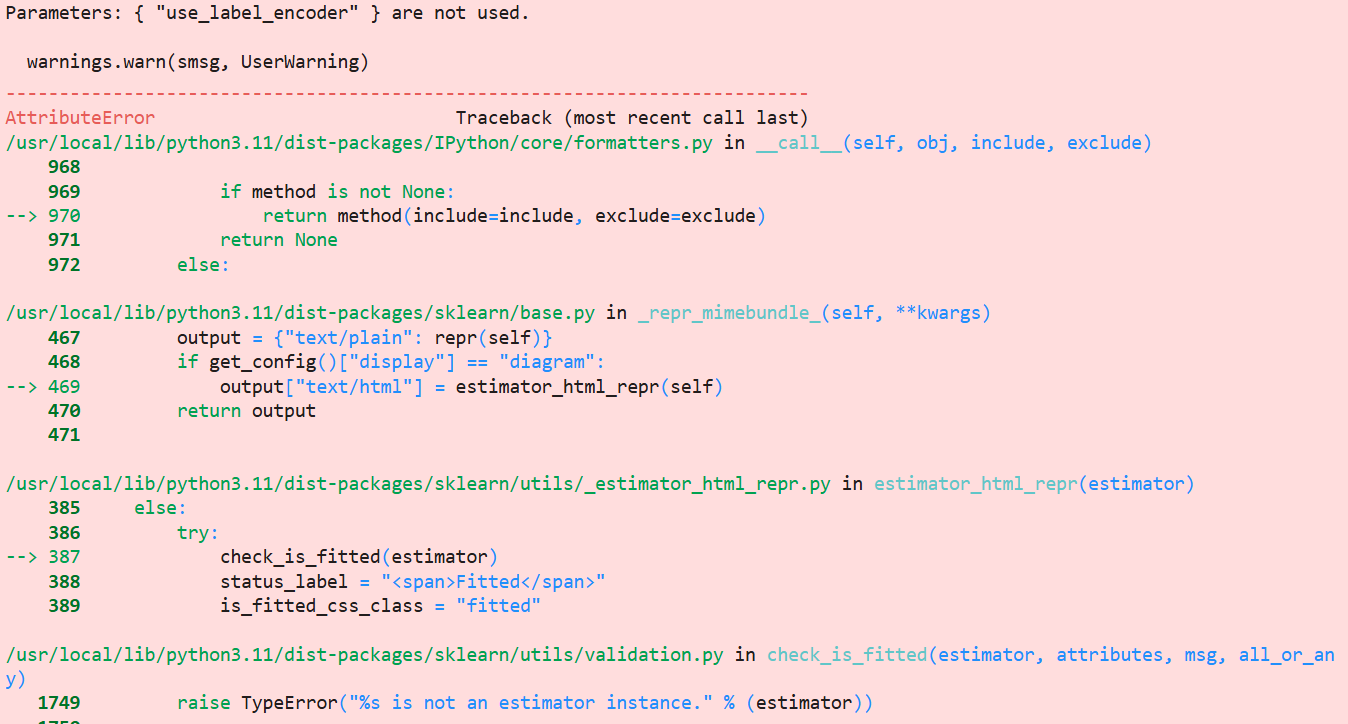

  


2.   **Cause**

 The line xgb_model.fit(X_train, y_train) is used to train the XGBoost model with the training data (X_train for features and y_train for labels). If you're encountering an error on this line, it could be due to several reasons.


*   Data Type Mismatch
*   NaN or Infinite Values

*   Incorrect Shape of X_train or y_train
*   Model Initialization Issue

*   Incompatible Versions
*  Out of Memory (OOM) Issues

*   Error in Model Fitting


3.  **Resolution:**

  **Missing Values:** Without handling missing values, XGBoost would throw an error during the fitting process because it doesn't know how to handle NaN values. The imputer resolved this.

  **Ensuring y_train Format:** If y_train was improperly shaped (e.g., 2D), flattening it would resolve any dimensionality issues, although in this case, it seems y_train was already fine.
  
  **Catching Errors:** The try-except block ensures you can see detailed error messages, which helps you understand what went wrong if an error occurs.

 **Potential Issues Before Resolution:**

*   **NaN or Missing Values:**
     In the resolution code, we correctly handled missing values using the SimpleImputer:

  **imputer = SimpleImputer(strategy='mean')**

  **X_train = imputer.fit_transform(X_train)**
  
  **X_test = imputer.transform(X_test)**

   This step replaces any missing values in X_train and X_test with the mean of the respective columns, ensuring the data is clean for training.

*   **Shape Mismatch for y_train:**

  If You didn’t explicitly flatten y_train in your resolution code, but XGBoost generally handles 1D arrays well. However, if y_train was 2D, using .ravel() would flatten it, like so:

  **y_train = y_train.ravel()**


*   **Model Parameter Compatibility:**

  The XGBClassifier you're using might have some parameters that need to be configured. For example, **use_label_encoder=False** disables a deprecation warning in some versions of XGBoost.

 **By Resolving:**

  xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

*   **Error Handling:**

   Your resolution code includes a try-except block that catches and prints any errors that occur during training:

   **try:**

  **xgb_model.fit(X_train, y_train)**

  **except Exception as e:**

  **print(f"Error while fitting XGBoost: {e}")**





















### **6.7 Make Predictions**

This code uses the trained Random Forest model to predict outcomes on the test dataset.

- **`predict(X_test)`**:  
  - Generates predictions for the test features (`X_test`) based on patterns learned during training.  
- **`rf_predictions`**: Stores the predicted labels for further evaluation.


In [ ]:
# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### **6.8 Evaluate Model Accuracy**

This code evaluates the performance of the Random Forest model.

- **`accuracy_score(y_test, rf_predictions)`**:  
  - Calculates the proportion of correctly predicted labels in the test set (`y_test`) compared to predictions (`rf_predictions`).  
- **`print`**: Displays the model's accuracy as a percentage for easy interpretation.


In [ ]:
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

XGBoost Accuracy: 0.8759404268386304


## **Section 7: Naive Bayes**

### **7.1 Naive Bayes Overview**

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It assumes that features are conditionally independent, which simplifies calculations and makes the algorithm efficient.

- **Key Features**:  
  - Fast and easy to implement.  
  - Works well for small datasets and high-dimensional data.  
  - Suitable for both binary and multi-class classification tasks.  

- **Applications**:  
  - Spam email detection.  
  - Sentiment analysis.  
  - Document classification.  

This section applies Naive Bayes to the prepared dataset.


### **7.2 Load SMS Spam Collection Dataset**

This code loads the SMS Spam Collection dataset, which is used for spam classification tasks.

- **Dataset**: Contains labeled SMS messages to classify whether a message is "ham" (not spam) or "spam".  

- **`sms_url`**:  
  - Provides the URL to the dataset in TSV (tab-separated values) format.  

- **`pd.read_csv`**:  
  - Reads the dataset from the URL and loads it into a pandas DataFrame.  
  - **`sep='\t'`**: Specifies that the data is tab-separated.  
  - **`header=None`**: Indicates that the dataset does not have a predefined header row.  
  - **`names=['label', 'message']`**: Assigns meaningful column names:
    - `label`: Indicates whether the message is "ham" or "spam".
    - `message`: The actual text of the SMS message.


In [ ]:
# -------------------------------------------------
# Naive Bayes: Using SMS Spam Collection dataset
# -------------------------------------------------
sms_url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
sms_data = pd.read_csv(sms_url, sep='\t', header=None, names=['label', 'message'])

### **7.3 Preview Dataset**

This code displays the first five rows of the SMS Spam Collection dataset to verify its structure and content.

- **`sms_data.head()`**:  
  - Outputs the top 5 rows of the DataFrame `sms_data`.  
  - Confirms that the dataset has been loaded correctly with two columns:
    - **`label`**: Indicates the class ("ham" or "spam").  
    - **`message`**: Contains the SMS text message.

In [ ]:
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **7.4 Encode Labels**

This code converts the textual labels ("ham" and "spam") in the `label` column into numerical format.

- **`map({'ham': 0, 'spam': 1})`**:  
  - Maps "ham" to `0` (non-spam messages) and "spam" to `1` (spam messages).  
  - Ensures the labels are in a format suitable for machine learning algorithms, which typically work with numerical data.

- **Why?**:  
  - Encoding makes it easier for the model to interpret and classify the labels during training and evaluation.

The modified `label` column now contains binary values (0 or 1) instead of text.


In [ ]:
sms_data['label'] = sms_data['label'].map({'ham': 0, 'spam': 1})

### **7.5 Verify Label Encoding**

This code displays the first five rows of the updated dataset to confirm that the `label` column has been successfully encoded.

- **`sms_data.head()`**:  
  - Outputs the top 5 rows of the DataFrame `sms_data`.  
  - Verifies that the `label` column now contains binary values:  
    - `0`: Represents "ham" (non-spam).  
    - `1`: Represents "spam".


In [ ]:
sms_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### **7.6 Convert Text to Features**

This code transforms the text messages into numerical feature vectors using the Bag-of-Words model.

- **`CountVectorizer`**:  
  - Converts text data into a matrix of token (word) counts.  
  - Each row represents a message, and each column corresponds to a unique word in the dataset.  
  - **Key Parameters**:
    - **`fit_transform`**:
      - Fits the vectorizer to the text data (`sms_data['message']`).  
      - Transforms each message into a sparse matrix of word counts.

- **`X`**:  
  - Contains the numerical feature matrix where rows represent SMS messages and columns represent unique words (features).

- **`y`**:  
  - Stores the target variable (`label`) for classification tasks, with binary values (`0` for "ham", `1` for "spam").

This step prepares the dataset for machine learning by converting text data into a format that can be processed by algorithms.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_data['message'])
y = sms_data['label']

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74169 stored elements and shape (5572, 8713)>

### **7.7 Preview Target Variable**

This code displays the first five rows of the target variable (`y`) to verify its structure and content.

- **`y.head().to_frame()`**:  
  - Converts the `y` Series into a DataFrame for better visualization in tabular format.  
  - Confirms that the target variable contains binary values:  
    - `0`: Represents "ham" (non-spam).  
    - `1`: Represents "spam".

This ensures the target variable is correctly prepared for model training and evaluation.


In [ ]:
y.head().to_frame()

,label
0,0
1,0
2,1
3,0
4,0


### **7.8 Split Dataset**

This code splits the dataset into training and testing subsets for model training and evaluation.

- **`train_test_split`**: A scikit-learn function that randomly splits the data.  
  - **Parameters**:
    - **`X`**: Feature matrix (numerical representations of the SMS messages).  
    - **`y`**: Target variable (labels: 0 for "ham" and 1 for "spam").  
    - **`test_size=0.2`**: Reserves 20% of the data for testing and 80% for training.  
    - **`random_state=42`**: Ensures reproducibility by fixing the random seed.

- **Output Variables**:
  - **`X_train`**: Features for training the model.  
  - **`X_test`**: Features for testing the model.  
  - **`y_train`**: Target labels for training.  
  - **`y_test`**: Target labels for testing.

This step is crucial to evaluate the model's ability to generalize to unseen data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **7.9 Train Naive Bayes Model**

This code initializes and trains a Naive Bayes classifier.

- **`GaussianNB`**: A scikit-learn class implementing the Naive Bayes algorithm, suitable for continuous data that follows a Gaussian distribution.  
- **`fit(X_train, y_train)`**: Trains the model using the training data (`X_train` and `y_train`) to learn the relationships between features and the target variable.


In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train.toarray(), y_train)

GaussianNB()

### **7.10 Make Predictions**

This code uses the trained Naive Bayes model to predict outcomes for the test dataset.

- **`predict(X_test)`**:  
  - Predicts the target labels for the test features (`X_test`) based on learned probabilities.  
- **`nb_predictions`**: Stores the predicted labels for evaluation.


In [ ]:
# Predict and evaluate
nb_predictions = nb_model.predict(X_test.toarray())
nb_predictions

array([0, 0, 0, ..., 0, 0, 1])

### **7.11 Evaluate Model Accuracy**

This code evaluates the performance of the Naive Bayes model.

- **`accuracy_score(y_test, nb_predictions)`**:  
  - Compares the actual test labels (`y_test`) with the predicted labels (`nb_predictions`) to compute the accuracy.  
- **`print`**: Displays the accuracy of the model as a percentage to measure its effectiveness.


In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))

Naive Bayes Accuracy: 0.9067264573991032


## **Section 8: K-Nearest Neighbors (KNN)**

### **8.1 K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for classification and regression tasks.

- **Key Characteristics**:
  - **Instance-Based Learning**: Does not learn a model; instead, it memorizes the training dataset.
  - **Lazy Algorithm**: Defers computation until prediction, making it slower for large datasets.
  - **Similarity-Based**: Classifies new data points based on the majority class of their nearest neighbors.

- **How KNN Works**:
  1. Choose the number of neighbors (`k`).
  2. Compute the distance (e.g., Euclidean) between the test point and all training points.
  3. Select the `k` nearest neighbors.
  4. Assign the class of the majority of these neighbors (for classification) or compute the average (for regression).

- **Advantages**:
  - Simple to understand and implement.
  - No training phase; directly works with data.
  - Effective for smaller datasets.

- **Disadvantages**:
  - Computationally expensive for large datasets.
  - Sensitive to irrelevant features and the choice of `k`.

- **Applications**:
  - Handwriting recognition.
  - Recommendation systems.
  - Disease diagnosis.

In this section, we will implement and evaluate KNN for classification tasks.


### **8.2 Load Iris Dataset**

This code initializes the necessary libraries and loads the Iris dataset, which is widely used for classification tasks.

- **Libraries**:
  - **`numpy`**: For numerical operations.
  - **`matplotlib.pyplot`**: For visualizations.
  - **`sklearn` modules**:
    - **`load_iris`**: To load the Iris dataset.
    - **`train_test_split`**: For splitting the dataset into training and testing sets.
    - **`KNeighborsClassifier`**: Implements the K-Nearest Neighbors algorithm.
    - **`accuracy_score`**: To evaluate the model's performance.
    - **`PCA`**: For dimensionality reduction to visualize the data.

- **Dataset**:
  - **`iris.data`**: Contains the feature matrix (measurements of sepal and petal length/width).
  - **`iris.target`**: Contains the target variable (class labels: 0, 1, or 2 representing Iris Setosa, Iris Versicolour, and Iris Virginica).

The Iris dataset is a small and well-structured dataset, making it suitable for demonstrating the KNN algorithm and visualizing the data.


In [ ]:
# -------------------------------------------------
# KNN: Using Iris dataset with Visualizations
# -------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix (sepal and petal length/width)
y = iris.target

### **8.3 Feature Matrix Overview**

This command displays the feature matrix `X` from the Iris dataset.

- **`X`**:
  - Represents the feature matrix containing measurements for each sample in the dataset.  
  - Columns correspond to features:
    - Sepal length.  
    - Sepal width.  
    - Petal length.  
    - Petal width.  
  - Each row corresponds to a data sample (flower).

This step ensures the feature matrix is loaded correctly and ready for further processing.


In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### **8.4 Target Variable Overview**

This command displays the target variable `y` from the Iris dataset.

- **`y`**:
  - Represents the target labels for classification.  
  - Contains integers (0, 1, 2) corresponding to the three Iris flower species:  
    - `0`: Iris Setosa.  
    - `1`: Iris Versicolour.  
    - `2`: Iris Virginica.  

This step ensures the target labels are correctly loaded and match the feature matrix `X`.


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **8.5 Dimensionality Reduction for Visualization**

This code reduces the feature matrix `X` to two dimensions using Principal Component Analysis (PCA) to facilitate visualization.

- **`PCA(n_components=2)`**:  
  - Initializes a PCA model to reduce the data to 2 dimensions (2 principal components).  
  - Captures the maximum variance in the dataset while reducing dimensions.  

- **`fit_transform(X)`**:  
  - Fits the PCA model to the original feature matrix `X`.  
  - Transforms the data into a 2D space.  

- **`X_2d`**:  
  - Stores the transformed data with two dimensions, making it suitable for visualization.  

This step simplifies the high-dimensional data into a 2D representation, enabling clear visualization of the Iris dataset in a scatter plot.


In [ ]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

### **8.6 Split Data for Training and Testing**

This code splits the dataset into training and testing subsets using the 2D feature matrix obtained from PCA.

- **`train_test_split`**:  
  - A scikit-learn function to randomly split the data into training and testing sets.  
  - **Parameters**:  
    - **`X_2d`**: The 2D feature matrix obtained after PCA.  
    - **`y`**: The target variable containing class labels.  
    - **`test_size=0.3`**: Allocates 30% of the data for testing and 70% for training.  
    - **`random_state=42`**: Ensures the split is reproducible by fixing the random seed.  

- **Output Variables**:  
  - **`X_train`**: Training features for model training.  
  - **`X_test`**: Test features for model evaluation.  
  - **`y_train`**: Training labels for supervised learning.  
  - **`y_test`**: Test labels for performance evaluation.

This step ensures that the model is trained and tested on separate datasets, allowing for an unbiased evaluation of its performance.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

### **8.7 Train K-Nearest Neighbors (KNN) Model**

This code initializes and trains a K-Nearest Neighbors (KNN) model using the training dataset.

- **`KNeighborsClassifier(n_neighbors=3)`**:  
  - Initializes a KNN classifier with `k=3` neighbors.  
  - The model predicts the class of a data point based on the majority class of its 3 nearest neighbors.  

- **`fit(X_train, y_train)`**:  
  - Trains the KNN model using the training dataset (`X_train` and `y_train`).  
  - Stores the training data for use during prediction, as KNN is a lazy learning algorithm.

This step prepares the KNN model to classify new data points based on the training data.


In [ ]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **8.8 Make Predictions and Evaluate Model**

This code uses the trained K-Nearest Neighbors (KNN) model to make predictions on the test dataset and evaluates its accuracy.

- **`predict(X_test)`**:  
  - Generates predictions for the test dataset (`X_test`) based on the 3 nearest neighbors for each data point.  
  - **`knn_predictions`**: Stores the predicted class labels for the test data.

- **`accuracy_score(y_test, knn_predictions)`**:  
  - Compares the actual test labels (`y_test`) with the predicted labels (`knn_predictions`).  
  - Calculates the proportion of correctly classified instances in the test dataset.  

- **`print`**:  
  - Displays the accuracy of the KNN model on the Iris dataset.  
  - Accuracy provides a quantitative measure of the model's performance.

This step evaluates how well the KNN model classifies the Iris dataset.


In [ ]:
# Make predictions and evaluate
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy on Iris dataset:", accuracy_score(y_test, knn_predictions))

KNN Accuracy on Iris dataset: 1.0


### **8.9 Visualize KNN Decision Boundaries**

This code visualizes the decision boundaries of the K-Nearest Neighbors (KNN) model on the 2D PCA-reduced Iris dataset.

- **Mesh Grid for Plotting**:
  - **`np.meshgrid`**: Creates a grid of points in the 2D feature space to evaluate the model's predictions.
    - **`x_min` and `x_max`**: Define the range of the first principal component.
    - **`y_min` and `y_max`**: Define the range of the second principal component.
    - **`np.arange(..., 0.1)`**: Creates grid points at 0.1 intervals for smooth visualization.

- **Predict Class Labels for Grid Points**:
  - **`predict`**: Predicts the class labels for each point in the grid using the trained KNN model.
  - **`np.c_[xx.ravel(), yy.ravel()]`**: Converts the grid points into a format suitable for prediction.
  - **`Z`**: Stores the predicted class labels for each grid point. It is reshaped to match the grid's shape.

- **Plot Decision Boundaries**:
  - **`plt.contourf`**: Fills the decision regions with different colors for each class.
  - **`plt.scatter`**: Plots the actual data points (Iris samples) in the 2D space, colored by their true class labels.

- **Plot Configuration**:
  - **Title**: Describes the plot as "KNN Decision Boundaries on Iris Dataset".
  - **Axes Labels**: Principal Component 1 and Principal Component 2.
  - **`plt.colorbar()`**: Adds a color bar to indicate class labels.

This step provides a visual understanding of how the KNN model classifies the Iris dataset, showing the decision regions for each class and the placement of actual data points.


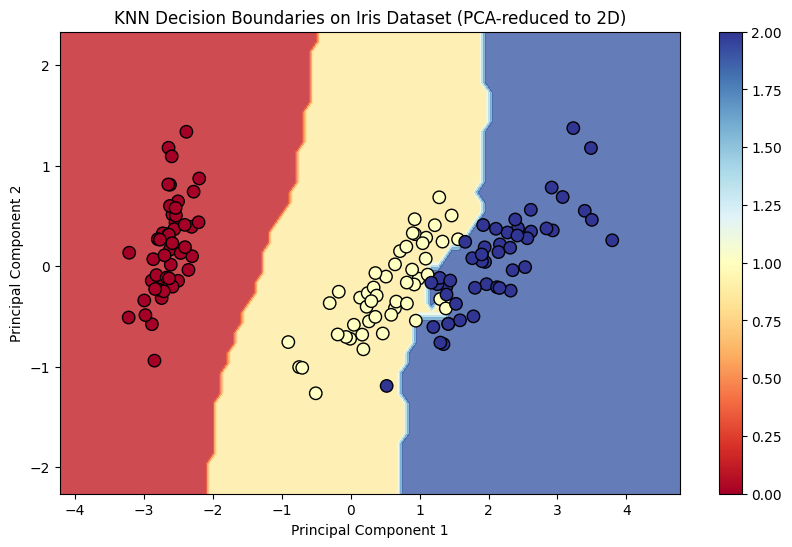

In [ ]:
# -------------------------------------------------
# Visualize decision boundaries
# -------------------------------------------------
# Create a mesh grid to plot decision boundaries
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the mesh
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, s=80)
plt.title("KNN Decision Boundaries on Iris Dataset (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

### **8.10 Accuracy vs. K-Value Plot**

This code evaluates the K-Nearest Neighbors (KNN) model for different values of `k` (number of neighbors) and stores the accuracy for each `k`. This process is part of hyperparameter tuning to find the optimal `k`.

- **`k_values`**:  
  - A range of integers from 1 to 20 representing the number of neighbors to be tested.

- **Accuracy Calculation Loop**:
  - **`for k in k_values`**: Iterates through each `k` value in the specified range.
  - **`KNeighborsClassifier(n_neighbors=k)`**: Initializes a KNN model with the current value of `k`.
  - **`fit(X_train, y_train)`**: Trains the KNN model on the training data.
  - **`predict(X_test)`**: Predicts the class labels for the test dataset using the trained model.
  - **`accuracy_score(y_test, knn_predictions)`**: Calculates the accuracy for the current `k`.
  - **`accuracies.append(...)`**: Appends the calculated accuracy to the `accuracies` list.

- **Purpose**:
  - To identify the value of `k` that maximizes the model's accuracy on the test dataset.

This step is essential for selecting the optimal hyperparameter (`k`) for the KNN algorithm.


In [ ]:
# -------------------------------------------------
# Accuracy vs. K-Value plot (Hyperparameter tuning)
# -------------------------------------------------
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, knn_predictions))


### **8.11 Plot Accuracy vs. K-Value**

This code visualizes the relationship between the number of neighbors (`k`) and the model's accuracy, aiding in the selection of the optimal `k` value.

- **`plt.figure(figsize=(10, 6))`**:  
  - Configures the plot size for better visualization.

- **`plt.plot`**:  
  - Plots the accuracy values against the corresponding `k` values.  
  - **`marker='o'`**: Uses circular markers to represent accuracy values.  
  - **`color='b'`**: Sets the line color to blue.  
  - **`linestyle='-'`**: Uses a solid line to connect the points.  
  - **`linewidth=2`**: Sets the width of the line.  
  - **`markersize=6`**: Adjusts the size of the markers.

- **Labels and Title**:
  - **`plt.title`**: Sets the plot title to "Accuracy vs. K-Value for KNN".  
  - **`plt.xlabel`**: Labels the x-axis as "Number of Neighbors (k)".  
  - **`plt.ylabel`**: Labels the y-axis as "Accuracy".  

- **Ticks and Grid**:
  - **`plt.xticks(k_values)`**: Ensures all `k` values are displayed on the x-axis.  
  - **`plt.grid(True)`**: Adds grid lines for better readability.

- **`plt.show()`**:
  - Renders and displays the plot.

This visualization helps identify the `k` value that maximizes the model's accuracy, providing insights into the performance of the KNN algorithm with varying numbers of neighbors.


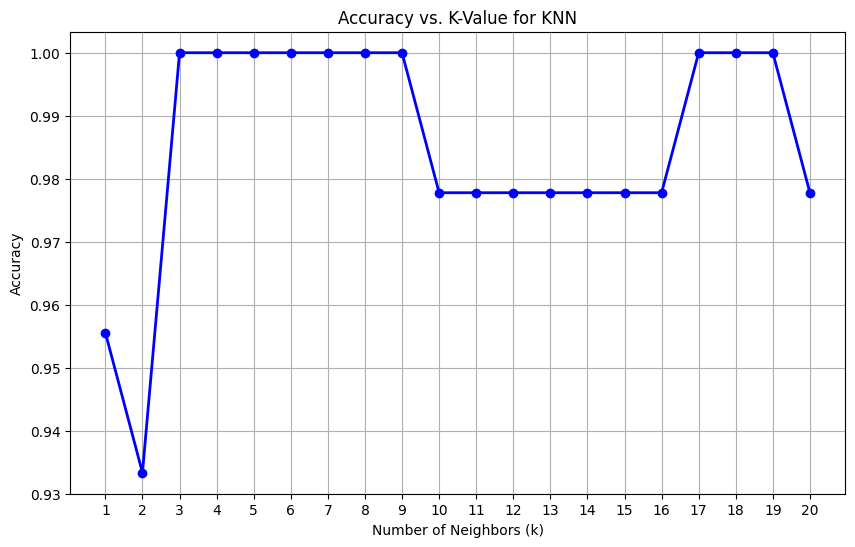

In [ ]:
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title("Accuracy vs. K-Value for KNN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

### **Conclusion: Supervised Machine Learning**

In this notebook, we explored multiple supervised machine learning algorithms, applied them to diverse datasets, and gained insights into their applications, performance, and visualization techniques. Here is a summary of what we learned:

---

#### **1. Understanding Supervised Learning**
- Supervised learning involves training a model using labeled data, where the target variable is known.
- The goal is to make predictions or classify new, unseen data accurately.

---

#### **2. Algorithms Explored**
We implemented the following algorithms and evaluated their performance:

- **Random Forest**:
  - An ensemble learning technique combining multiple decision trees to improve accuracy and reduce overfitting.
  - Applied to the Pima Indians Diabetes dataset.
  - Key takeaway: Random Forest is robust and handles non-linear relationships well.

- **Naive Bayes**:
  - A probabilistic algorithm based on Bayes' Theorem with an independence assumption.
  - Applied to the SMS Spam Collection dataset.
  - Key takeaway: Naive Bayes is computationally efficient and works well for text classification tasks.

- **K-Nearest Neighbors (KNN)**:
  - A lazy learning algorithm that classifies data based on its nearest neighbors.
  - Applied to the Iris dataset with PCA for visualization and hyperparameter tuning.
  - Key takeaway: The choice of `k` significantly impacts performance, and visualization helps understand decision boundaries.

---

#### **3. Evaluation Metrics**
- Accuracy, precision, recall, and F1-score were used to evaluate the performance of models.
- Visualizations like accuracy plots and decision boundaries provided deeper insights into model behavior.

---

#### **4. Practical Insights**
- **Data Preparation**:
  - Cleaning data, encoding categorical variables, and splitting datasets are crucial steps for successful modeling.
- **Hyperparameter Tuning**:
  - Experimenting with parameters (e.g., `k` in KNN) enhances model performance.
- **Dimensionality Reduction**:
  - PCA simplifies visualization while retaining essential data characteristics.

---

#### **5. Key Learnings**
- Each algorithm has its strengths and weaknesses, making it suitable for different types of problems.
- Visualization techniques, such as decision boundaries and performance plots, aid in understanding and interpreting model behavior.
- Preprocessing steps like feature encoding and dimensionality reduction are critical for efficient and accurate predictions.

---

This notebook demonstrated how to apply, evaluate, and interpret supervised machine learning models effectively, equipping us with the skills to tackle a wide range of classification tasks.
